<div align="center">


</div>

<h1 align="center">Portuguese Bank Marketing Analysis</h1>

<div align="center">

---

</div>


### 1. Data Loading and Exploration

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [154]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/GangasrinivasKatraji/Predictive-Analysis-and-Strategic-Insights-for-Portuguese-Bank-Marketing-Campaigns/main/Dataset/bank-additional-full.csv')


In [155]:
# Display the first five rows of the dataframe
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [156]:
# Checking the info of the model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [157]:
# Summary statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [158]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 2. Exploratory Data Analysis (EDA)

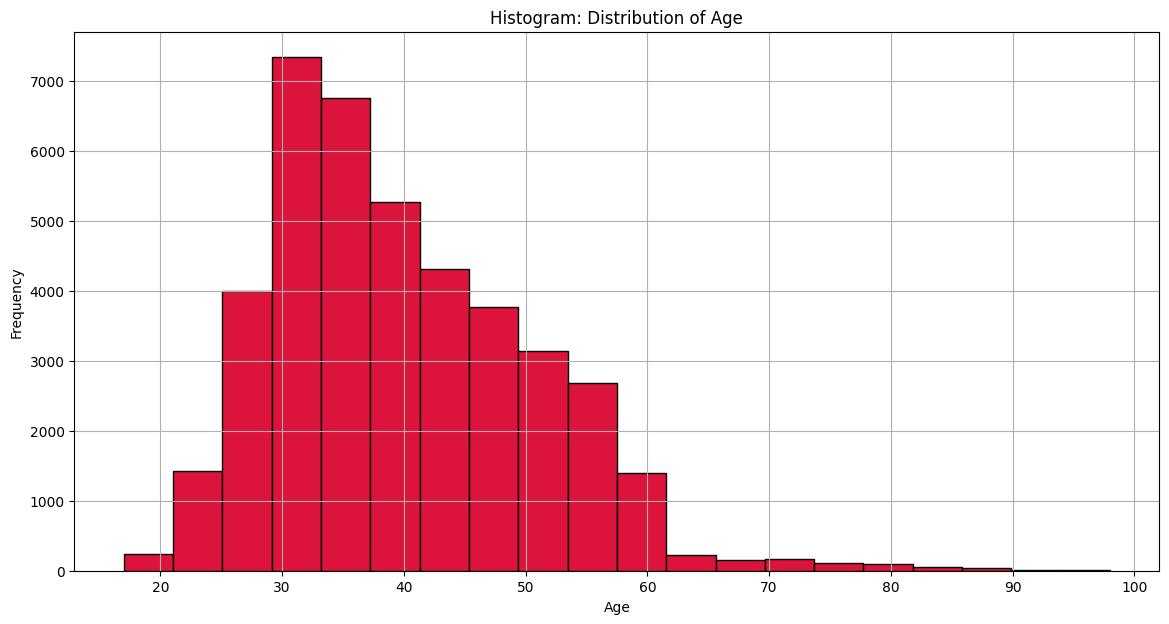

In [159]:
# Create a new figure with size 14x7 inches

plt.figure(figsize=(14, 7))  

# Plot histogram with 20 bins

plt.hist(df['age'], bins=20, color='crimson', edgecolor='black')  

# Set x-axis label

plt.xlabel('Age')  

# Set y-axis label

plt.ylabel('Frequency')  

# Set title of the plot

plt.title('Histogram: Distribution of Age')  

# Add gridlines

plt.grid(True)  

# Display the plot
plt.show()  

C:\Users\carrefour\AppData\Local\Temp\ipykernel_6904\200626497.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index, palette=color_palette)


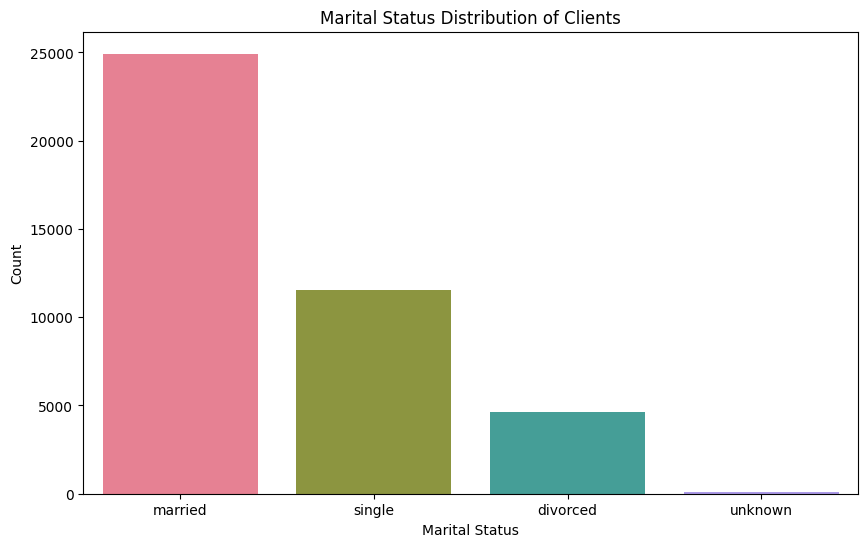

In [160]:
# Setting the size of the figure for our plot to be 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Creating a count plot using Seaborn to visualize the distribution of 'marital' statuses in our DataFrame 'df'
# Ordering the bars based on the count of each marital status category, with the most frequent shown first
color_palette = sns.color_palette("husl", len(df['marital'].unique()))
sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index, palette=color_palette)

# Adding a title to describe what our plot shows
plt.title('Marital Status Distribution of Clients')

# Labeling the x-axis to indicate it shows different marital status categories
plt.xlabel('Marital Status')

# Labeling the y-axis to show the count of clients in each marital status category
plt.ylabel('Count')

# Displaying the plot on the screen
plt.show()

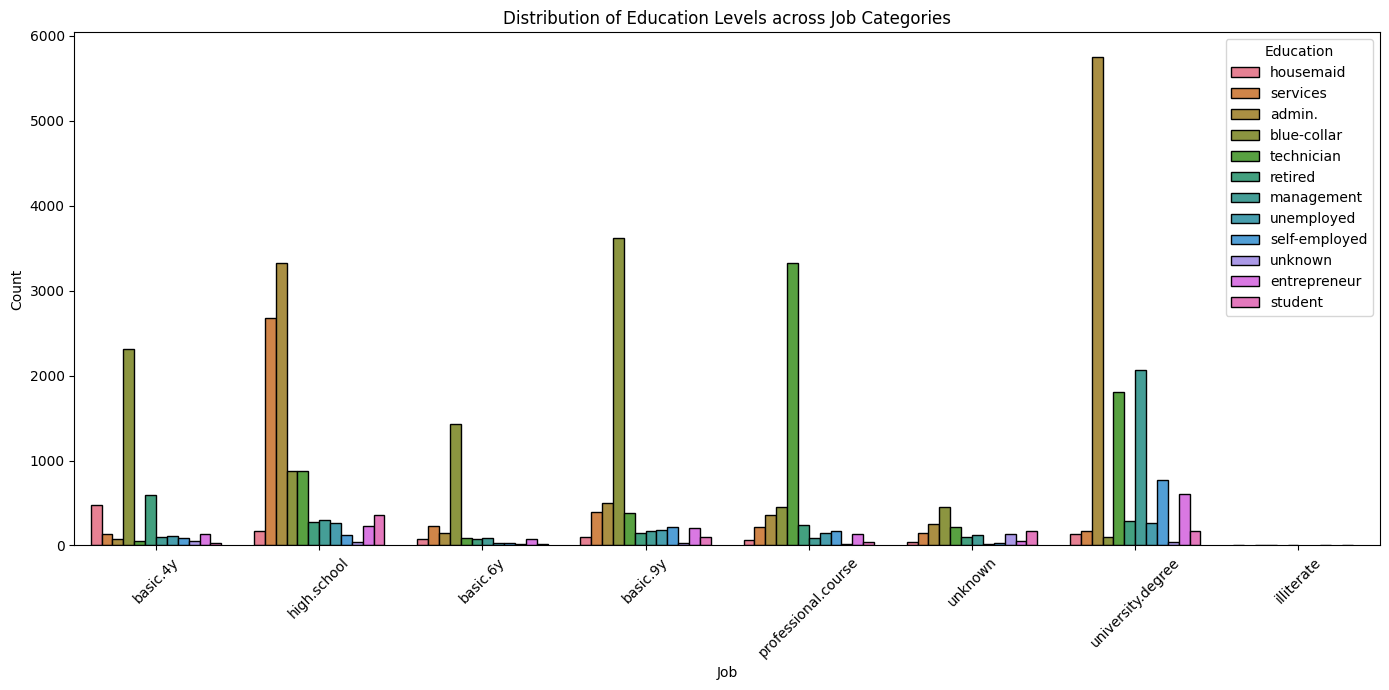

In [161]:
# Bar Chart of Education Levels by Job Category
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='education', hue='job', edgecolor='black')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Distribution of Education Levels across Job Categories')
plt.xticks(rotation=45)
plt.legend(title='Education')
plt.tight_layout()
plt.show()

C:\Users\carrefour\AppData\Local\Temp\ipykernel_6904\4083510610.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='job', order=df['job'].value_counts().index, palette=color_palette)


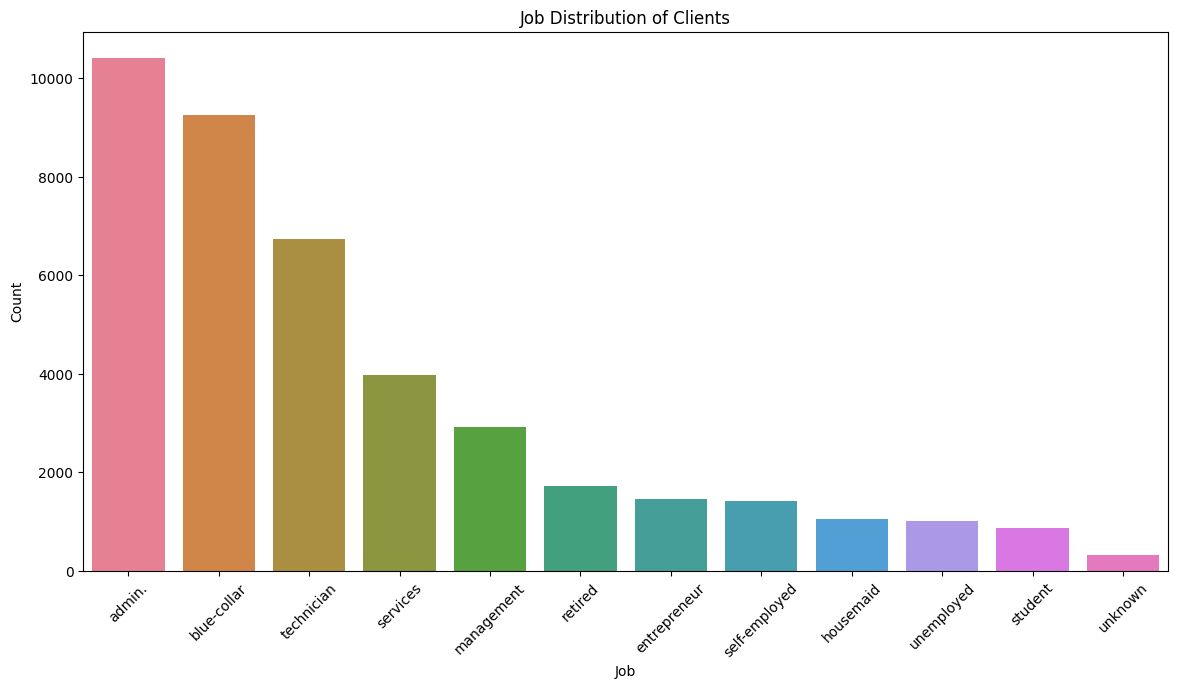

In [162]:
# We're setting up a plot that shows the distribution of job categories in our dataset.
# First, we create a figure (the space where our plot will go) with a size of 14 inches wide and 7 inches tall.
plt.figure(figsize=(14, 7))

# Using Seaborn's countplot function, we're plotting the 'job' column from our DataFrame 'df'.
# We're ordering the bars based on the count of each job category, so the most frequent job appears first.
color_palette = sns.color_palette("husl", len(df['job'].unique()))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index, palette=color_palette)

# Adding a title to our plot to describe what it shows.
plt.title('Job Distribution of Clients')

# Labeling the x-axis to indicate that it shows different job categories.
plt.xlabel('Job')

# Labeling the y-axis to show the count of clients in each job category.
plt.ylabel('Count')

# Rotating the x-axis labels by 45 degrees to prevent overlap and improve readability.
plt.xticks(rotation=45)

# Finally, we display the plot we've created.
plt.show()

C:\Users\carrefour\AppData\Local\Temp\ipykernel_6904\874645781.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='housing', order=df['housing'].value_counts().index, palette=color_palette)


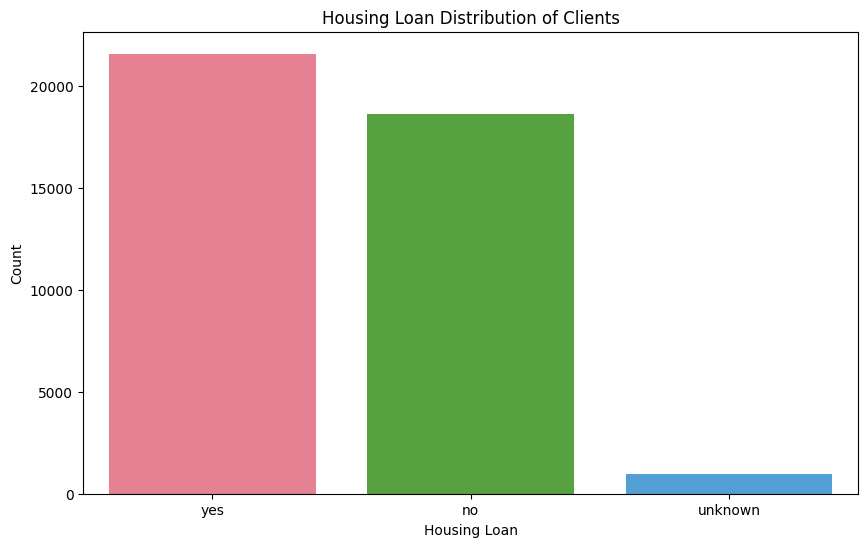

In [163]:
# Setting the size of the figure for our plot to be 10 inches wide and 6 inches tall.
plt.figure(figsize=(10, 6))

# Creating a count plot using Seaborn to visualize the distribution of 'housing' loan statuses in our DataFrame 'df'
# Ordering the bars based on the count of each housing loan category
color_palette = sns.color_palette("husl", len(df['housing'].unique()))
sns.countplot(data=df, x='housing', order=df['housing'].value_counts().index, palette=color_palette)

# Adding a title to describe what our plot shows
plt.title('Housing Loan Distribution of Clients')

# Labeling the x-axis to indicate it shows different housing loan categories
plt.xlabel('Housing Loan')

# Labeling the y-axis to show the count of clients in each housing loan category
plt.ylabel('Count')

# Displaying the plot on the screen
plt.show()

C:\Users\carrefour\AppData\Local\Temp\ipykernel_6904\3502364015.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan', order=df['loan'].value_counts().index, palette=color_palette)


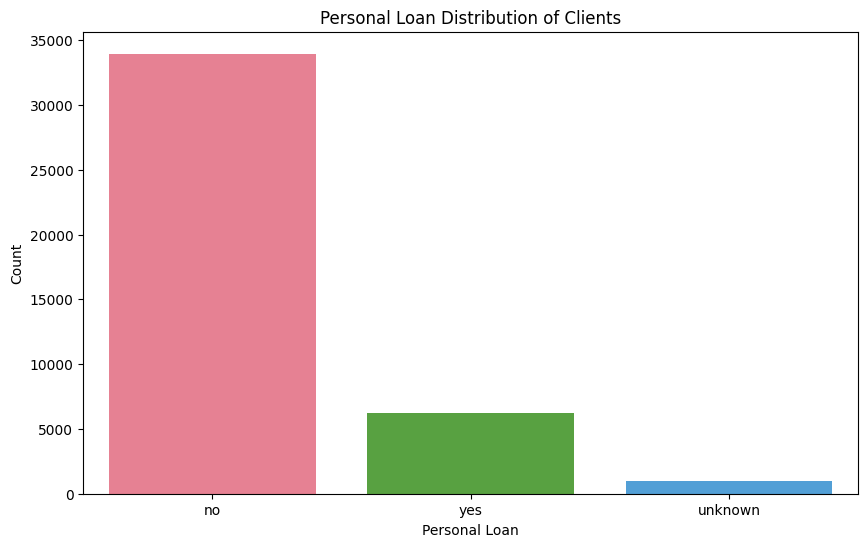

In [164]:
# Setting the size of the figure for our plot to be 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Creating a count plot using Seaborn to visualize the distribution of 'loan' statuses in our DataFrame 'df'
# Ordering the bars based on the count of each personal loan category
color_palette = sns.color_palette("husl", len(df['loan'].unique()))
sns.countplot(data=df, x='loan', order=df['loan'].value_counts().index, palette=color_palette)

# Adding a title to describe what our plot shows
plt.title('Personal Loan Distribution of Clients')

# Labeling the x-axis to indicate it shows different personal loan categories
plt.xlabel('Personal Loan')

# Labeling the y-axis to show the count of clients in each personal loan category
plt.ylabel('Count')

# Displaying the plot on the screen
plt.show()

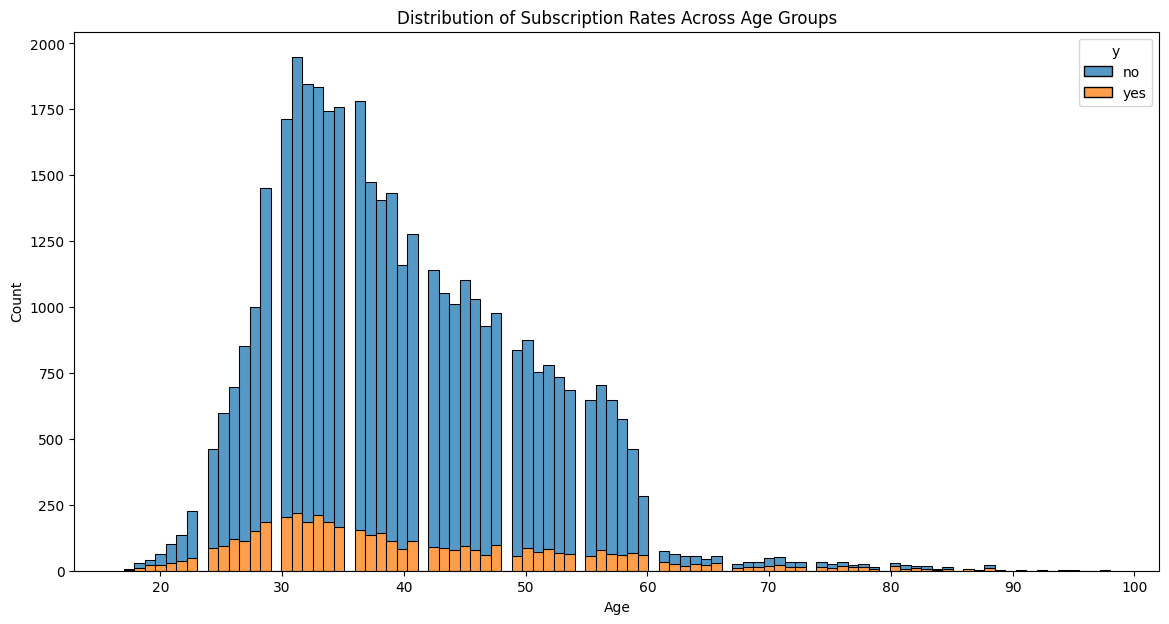

In [165]:
# Setting the size of the figure for our plot to be 14 inches wide and 7 inches tall
plt.figure(figsize=(14, 7))

# Creating a histogram plot using Seaborn to visualize the distribution of subscription rates ('y') across different age groups ('age')
# Using 'hue' to differentiate between subscription outcomes ('yes' and 'no') and 'multiple' to stack bars for better comparison
sns.histplot(data=df, x='age', hue='y', multiple='stack')

# Adding a title to describe what our plot shows
plt.title('Distribution of Subscription Rates Across Age Groups')

# Labeling the x-axis to indicate it shows different age groups
plt.xlabel('Age')

# Labeling the y-axis to show the count of subscriptions
plt.ylabel('Count')

# Displaying the plot on the screen
plt.show()

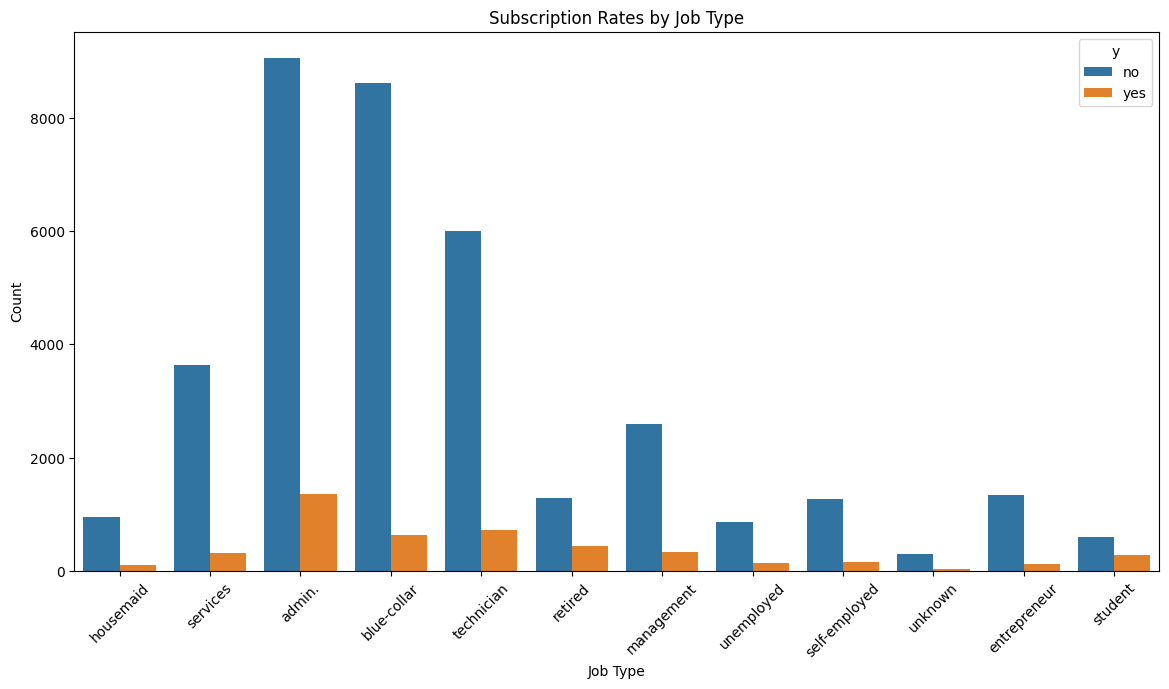

In [166]:
# Setting the size of the figure for our plot to be 14 inches wide and 7 inches tall
plt.figure(figsize=(14, 7))

# Creating a count plot using Seaborn to visualize the influence of job type ('job') on subscription rates ('y')
# Using 'hue' to differentiate between subscription outcomes ('yes' and 'no')
sns.countplot(data=df, x='job', hue='y')

# Adding a title to describe what our plot shows
plt.title('Subscription Rates by Job Type')

# Labeling the x-axis to indicate it shows different job types
plt.xlabel('Job Type')

# Labeling the y-axis to show the count of subscriptions
plt.ylabel('Count')

# Rotating x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Displaying the plot on the screen
plt.show()

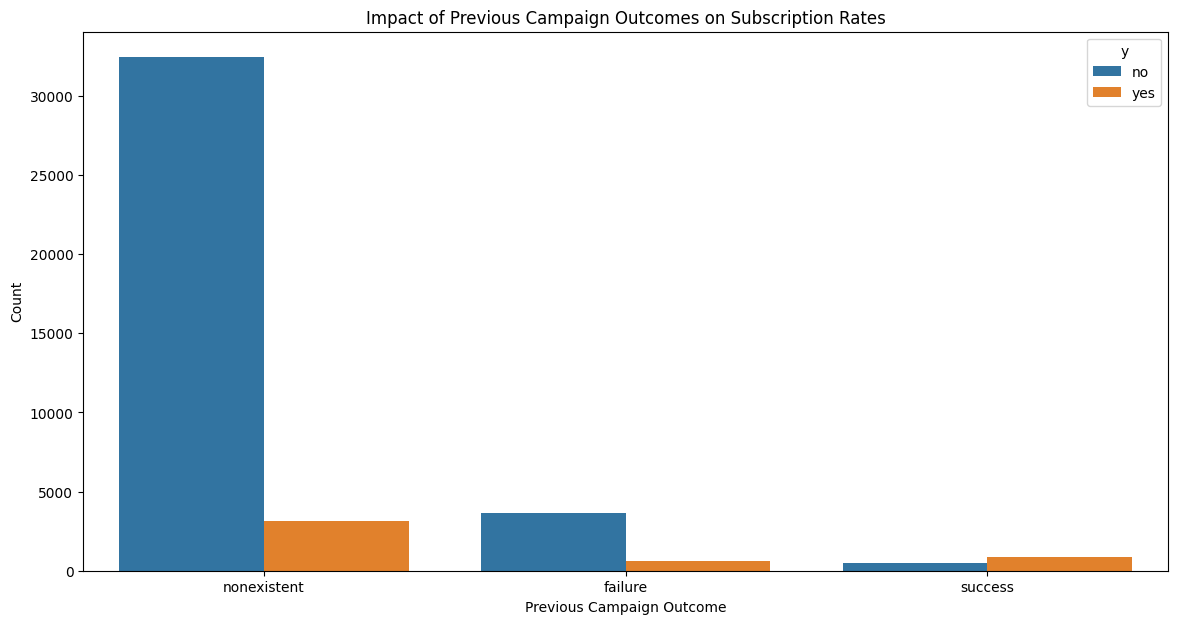

In [167]:
# Setting the size of the figure for our plot to be 14 inches wide and 7 inches tall
plt.figure(figsize=(14, 7))

# Creating a count plot using Seaborn to visualize the impact of previous campaign outcomes ('poutcome') 
# on subscription rates ('y')
# Using 'hue' to differentiate between subscription outcomes ('yes' and 'no')
sns.countplot(data=df, x='poutcome', hue='y')

# Adding a title to describe what our plot shows
plt.title('Impact of Previous Campaign Outcomes on Subscription Rates')

# Labeling the x-axis to indicate it shows different previous campaign outcomes
plt.xlabel('Previous Campaign Outcome')

# Labeling the y-axis to show the count of subscriptions
plt.ylabel('Count')

# Displaying the plot on the screen
plt.show()

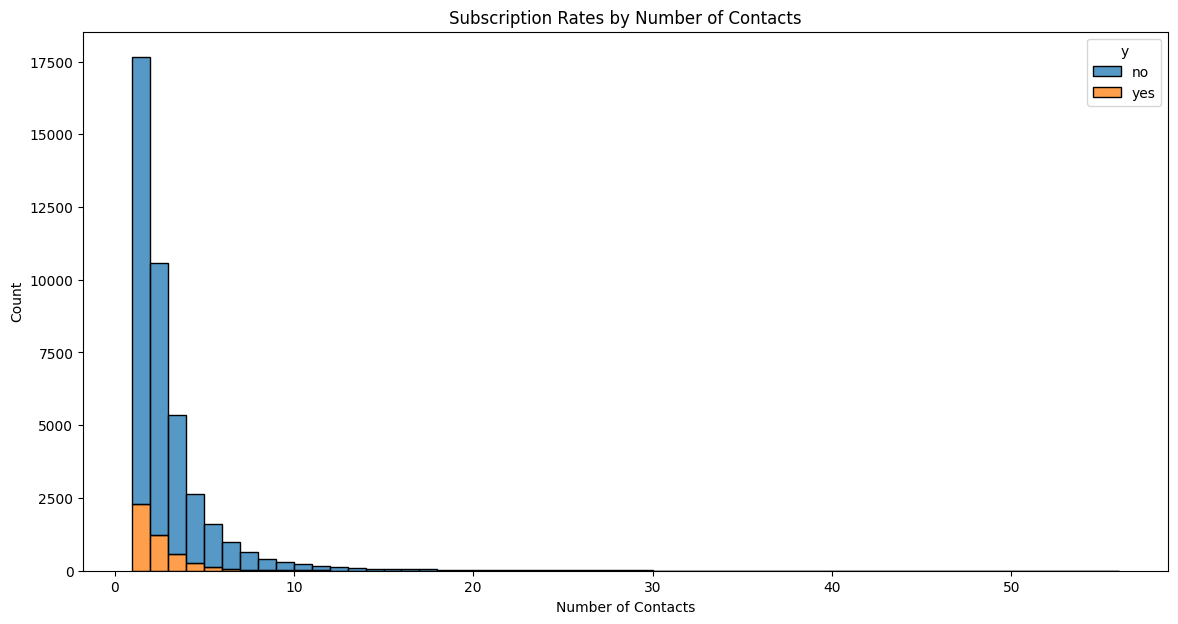

In [168]:
# Setting the size of the figure for our plot to be 14 inches wide and 7 inches tall
plt.figure(figsize=(14, 7))

# Creating a histogram plot using Seaborn to visualize the relationship between the number of contacts during the campaign ('campaign') 
# and subscription rates ('y')
# Using 'hue' to differentiate between subscription outcomes ('yes' and 'no') and 'multiple' to stack bars for better comparison
# Setting 'binwidth=1' to specify the width of bins for counting
sns.histplot(data=df, x='campaign', hue='y', multiple='stack', binwidth=1)

# Adding a title to describe what our plot shows
plt.title('Subscription Rates by Number of Contacts')

# Labeling the x-axis to indicate it shows different numbers of contacts during the campaign
plt.xlabel('Number of Contacts')

# Labeling the y-axis to show the count of subscriptions
plt.ylabel('Count')

# Displaying the plot on the screen
plt.show()

### 3. Data Preprocessing

In [169]:
# Dropping rows with missing values
df = df.dropna()

# Encoding categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
label_encoders = {}
for column in categorical_vars:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Encoding the target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Splitting the data into training and testing sets
X = df.drop(columns=['y'])
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 4. Model Building

In [170]:
# 4.1 - Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [171]:
# 4.2 - Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [172]:
# 4.3 - Random Forest Classifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [173]:
# 4.4 - Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [174]:
# 4.5 - Support Vector Machine Classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

### 5. Model Evaluation

In [175]:
# 5.1 - Logistic Regression Evaluation
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_log_reg))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238

ROC AUC Score: 0.6957402312872668
Confusion Matrix:
[[7108  195]
 [ 544  391]]


In [176]:
# 5.2 - Decision Tree Classifier Evaluation
y_pred_tree_clf = tree_clf.predict(X_test)
print("\nDecision Tree Classifier")
print(classification_report(y_test, y_pred_tree_clf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_tree_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree_clf))


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.52      0.53      0.52       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238

ROC AUC Score: 0.732292347808131
Confusion Matrix:
[[6853  450]
 [ 443  492]]


In [177]:
# 5.3 - Random Forest Classifier Evaluation
y_pred_forest_clf = forest_clf.predict(X_test)
print("\nRandom Forest Classifier")
print(classification_report(y_test, y_pred_forest_clf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_forest_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_forest_clf))


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.52      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238

ROC AUC Score: 0.7441627168089299
Confusion Matrix:
[[7042  261]
 [ 445  490]]


In [178]:
# 5.4 - Gradient Boosting Classifier Evaluation
y_pred_gb_clf = gb_clf.predict(X_test)
print("\nGradient Boosting Classifier")
print(classification_report(y_test, y_pred_gb_clf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_gb_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb_clf))


Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7303
           1       0.69      0.52      0.60       935

    accuracy                           0.92      8238
   macro avg       0.82      0.75      0.78      8238
weighted avg       0.91      0.92      0.91      8238

ROC AUC Score: 0.7472436424559243
Confusion Matrix:
[[7087  216]
 [ 445  490]]


In [179]:
# 5.5 - Support Vector Machine Classifier
y_pred_svm_clf = svm_clf.predict(X_test)
print("\nSupport Vector Machine")
print(classification_report(y_test, y_pred_svm_clf))
print("ROC AUC SCORE:", roc_auc_score(y_test, y_pred_svm_clf))
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred_svm_clf))


Support Vector Machine
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.40      0.50       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

ROC AUC SCORE: 0.687868731698423
confusion_matrix
[[7118  185]
 [ 560  375]]


#### Performance Summary Table

##### Analysis and Recommendation

##### Recommendation


<div align="center">

---

</div>

<h1 align="center">Thank You!</h1>

<div align="center">

---

</div>
